In [4]:
import os

current_path = os.getcwd()
print("Directory:", current_path)

Directory: C:\Users\Lenovo\Desktop\ProjectTeam2\archive


In [5]:
import pandas as pd

folder_path = r'C:\Users\Lenovo\Desktop\ProjectTeam2\archive'

# Check folder
if not os.path.exists(folder_path):
    print(f"Error: The folder path {folder_path} does not exist.")
elif not os.access(folder_path, os.R_OK):
    print(f"Error: The folder path {folder_path} is not readable.")
else:
    try:
        # List all CSV files in the directory
        csv_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]
        print("CSV Files:", csv_files)

        # List to hold individual DataFrames
        dataframes = []

        # Read each CSV file and append to the list
        for file in csv_files:
            df = pd.read_csv(file)
            dataframes.append(df)

        # Concatenate all DataFrames into one
        merged_df = pd.concat(dataframes, ignore_index=True)

        # Save the merged DataFrame
        output_path = r'C:\Users\Lenovo\Desktop\ProjectTeam2\merged_file.csv'
        merged_df.to_csv(output_path, index=False)
        print(f"Successfully merged files into {output_path}")
    except PermissionError as e:
        print(f"PermissionError: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")

CSV Files: ['C:\\Users\\Lenovo\\Desktop\\ProjectTeam2\\archive\\resale-flat-prices-based-on-approval-date-1990-1999.csv', 'C:\\Users\\Lenovo\\Desktop\\ProjectTeam2\\archive\\resale-flat-prices-based-on-approval-date-2000-feb-2012.csv', 'C:\\Users\\Lenovo\\Desktop\\ProjectTeam2\\archive\\resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv', 'C:\\Users\\Lenovo\\Desktop\\ProjectTeam2\\archive\\resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv', 'C:\\Users\\Lenovo\\Desktop\\ProjectTeam2\\archive\\resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv']
Successfully merged files into C:\Users\Lenovo\Desktop\ProjectTeam2\merged_file.csv


In [6]:
# Load the CSV file
folder_path = r'C:\Users\Lenovo\Desktop\ProjectTeam2\merged_file.csv'
data = pd.read_csv(folder_path)

# Display dataset information
data.info()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19188\4177076083.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(folder_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826581 entries, 0 to 826580
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                826581 non-null  object 
 1   town                 826581 non-null  object 
 2   flat_type            826581 non-null  object 
 3   block                826581 non-null  object 
 4   street_name          826581 non-null  object 
 5   storey_range         826581 non-null  object 
 6   floor_area_sqm       826581 non-null  float64
 7   flat_model           826581 non-null  object 
 8   lease_commence_date  826581 non-null  int64  
 9   resale_price         826581 non-null  float64
 10  remaining_lease      117527 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 69.4+ MB


In [7]:
# Check for missing values in the 'remaining_lease' column
missing_values = data['remaining_lease'].isnull().sum()

# Print the result
print(f"Number of missing values in 'remaining_lease' column: {missing_values}")

Number of missing values in 'remaining_lease' column: 709054


In [8]:
# Drop the 'remaining_lease' column
data = data.drop(columns=['remaining_lease'])

# Verify the column has been dropped
print(data.columns)

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')


In [9]:
# Display the unique items in the 'flat_type' column
unique_flat_types = data['flat_type'].unique()
print(unique_flat_types)

['1 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' '2 ROOM' 'EXECUTIVE'
 'MULTI GENERATION' 'MULTI-GENERATION']


In [10]:
# Replace 'MULTI GENERATION' with 'MULTI-GENERATION' in the 'flat_type' column
data['flat_type'] = data['flat_type'].replace('MULTI GENERATION', 'MULTI-GENERATION')

# Verify the replacement by displaying the unique items in the 'flat_type' column
unique_flat_types = data['flat_type'].unique()
print(unique_flat_types)

['1 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' '2 ROOM' 'EXECUTIVE'
 'MULTI-GENERATION']


In [11]:
# Convert 'month' column to datetime format
data['month'] = pd.to_datetime(data['month'])

# Extract the year and month from the 'month' column
data['year'] = data['month'].dt.year
data['month_num'] = data['month'].dt.month

# Verify the new columns
print(data[['year', 'month_num']].head())

   year  month_num
0  1990          1
1  1990          1
2  1990          1
3  1990          1
4  1990          1


In [12]:
# Define price ranges and create a new column 'price_category'
data['price_category'] = pd.qcut(data['resale_price'], q=3, labels=['low', 'medium', 'high'])

# Display 5 rows each for low, medium, and high price categories
low_price_rows = data[data['price_category'] == 'low'].head(5)
medium_price_rows = data[data['price_category'] == 'medium'].head(5)
high_price_rows = data[data['price_category'] == 'high'].head(5)

# Combine the results
combined_rows = pd.concat([low_price_rows, medium_price_rows, high_price_rows])

# Display the combined rows
print(combined_rows[['resale_price', 'price_category']])

       resale_price price_category
0            9000.0            low
1            6000.0            low
2            8000.0            low
3            6000.0            low
4           47200.0            low
530        228000.0         medium
620        225000.0         medium
622        235000.0         medium
1219       220000.0         medium
1220       238000.0         medium
42393      355000.0           high
43467      362000.0           high
44555      360000.0           high
45755      365000.0           high
45756      398000.0           high


In [13]:
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,month_num,price_category
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,1,low
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,1,low
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,1990,1,low
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,1990,1,low
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990,1,low


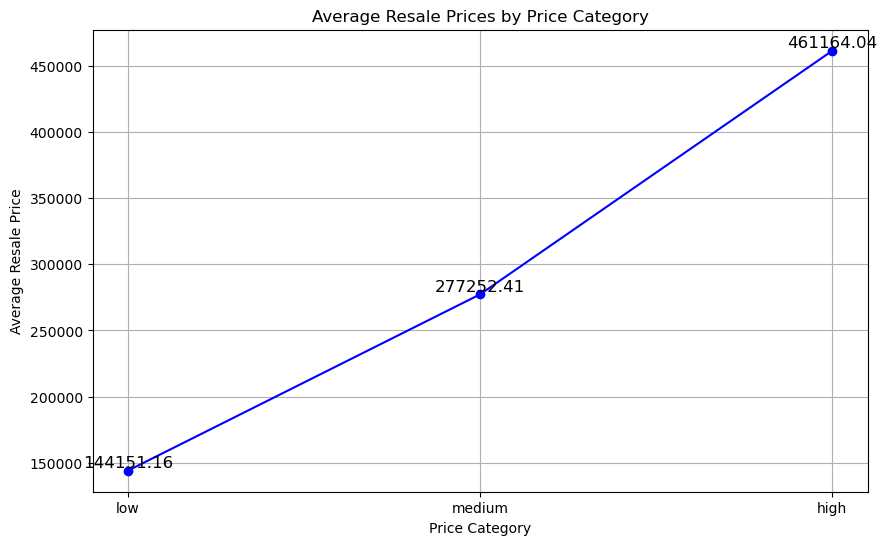

In [14]:
import matplotlib.pyplot as plt

# Calculate the average resale price for each price category
average_prices = data.groupby('price_category')['resale_price'].mean()

# Plot the average resale prices as a line graph
plt.figure(figsize=(10, 6))
plt.plot(average_prices.index, average_prices.values, marker='o', linestyle='-', color='b')

# Annotate each point with the average price value
for index, value in average_prices.items():
    plt.text(index, value, f'{value:.2f}', fontsize=12, ha='center', va='bottom')

plt.title('Average Resale Prices by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Average Resale Price')
plt.grid(True)
plt.show()

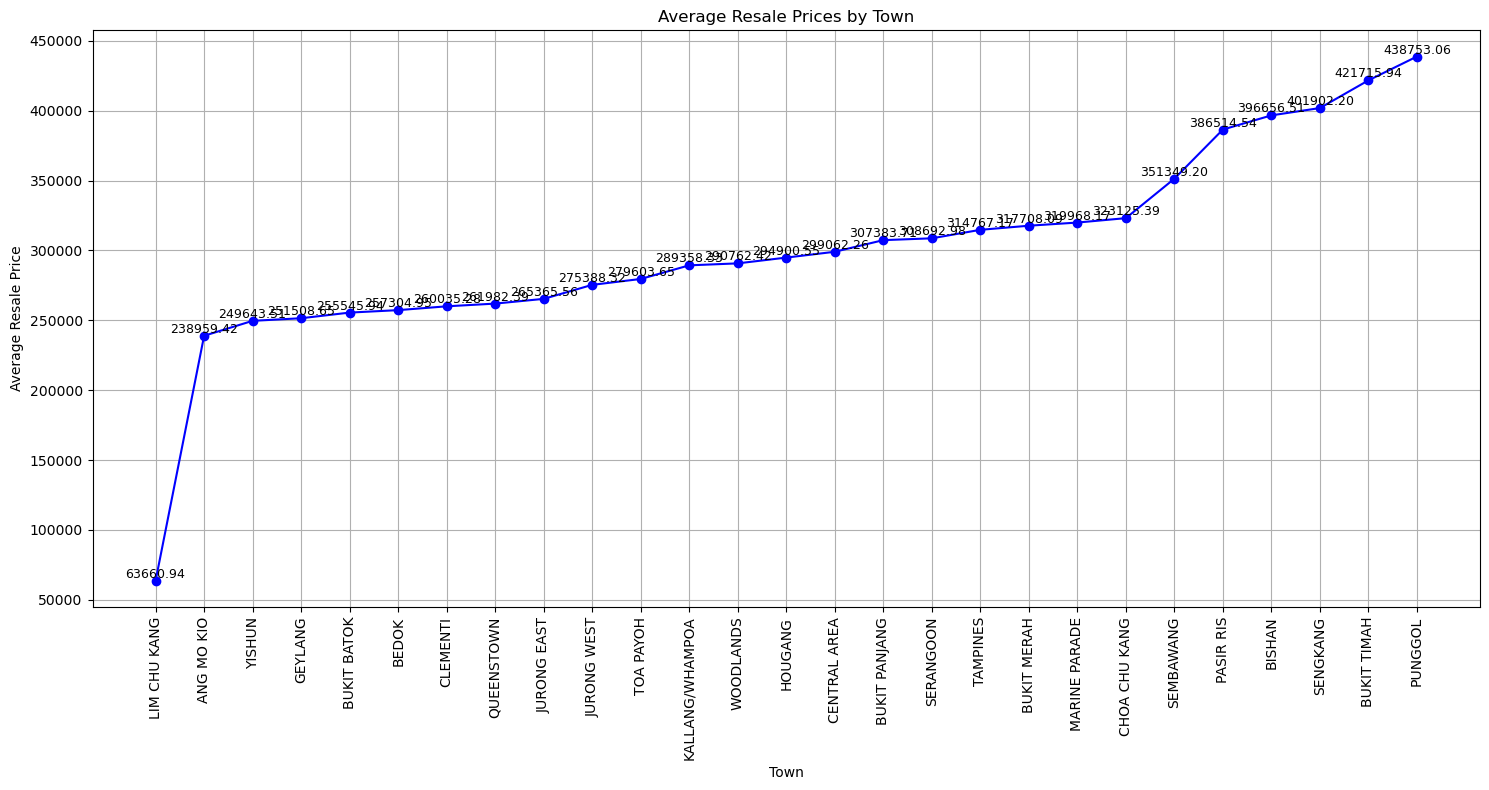

In [15]:
# Calculate the average resale price for each town
average_prices_by_town = data.groupby('town')['resale_price'].mean().sort_values()

# Plot the average resale prices by town as a line graph
plt.figure(figsize=(15, 8))
plt.plot(average_prices_by_town.index, average_prices_by_town.values, marker='o', linestyle='-', color='b')

# Annotate each point with the average price value
for index, value in average_prices_by_town.items():
    plt.text(index, value, f'{value:.2f}', fontsize=9, ha='center', va='bottom')

plt.title('Average Resale Prices by Town')
plt.xlabel('Town')
plt.ylabel('Average Resale Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

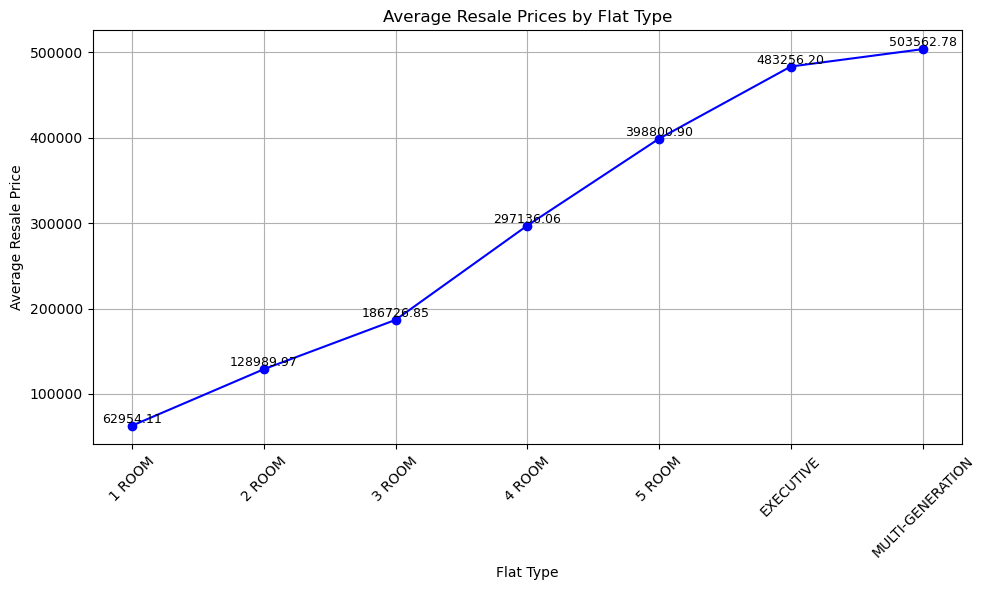

In [16]:
# Calculate the average resale price for each flat type
average_prices_by_flat_type = data.groupby('flat_type')['resale_price'].mean().sort_values()

# Plot the average resale prices by flat type as a line graph
plt.figure(figsize=(10, 6))
plt.plot(average_prices_by_flat_type.index, average_prices_by_flat_type.values, marker='o', linestyle='-', color='b')

# Annotate each point with the average price value
for index, value in average_prices_by_flat_type.items():
    plt.text(index, value, f'{value:.2f}', fontsize=9, ha='center', va='bottom')

plt.title('Average Resale Prices by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Average Resale Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Define features (X) and target (y)
features = ['town', 'flat_type', 'floor_area_sqm', 'lease_commence_date', 'year', 'month_num']
X = pd.get_dummies(data[features], drop_first=True)
y = data['price_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9175765347786374
Classification Report:
               precision    recall  f1-score   support

        high       0.93      0.93      0.93     54996
         low       0.95      0.95      0.95     55664
      medium       0.88      0.88      0.88     54657

    accuracy                           0.92    165317
   macro avg       0.92      0.92      0.92    165317
weighted avg       0.92      0.92      0.92    165317

Confusion Matrix:
 [[51213     5  3778]
 [   14 52603  3047]
 [ 3731  3051 47875]]


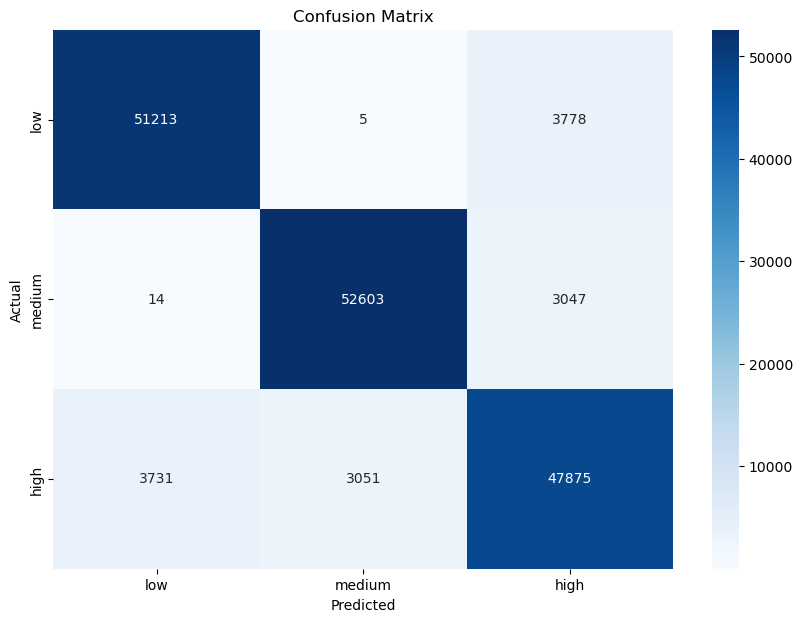

In [18]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['low', 'medium', 'high'], yticklabels=['low', 'medium', 'high'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# Check the unique values in the 'price_category' column
print("Unique values in 'price_category':", data['price_category'].unique())

def get_user_input(available_towns, available_flat_types, available_storey_ranges):
    while True:
        # Display available town options and ask the user to choose
        print("\nAvailable Towns:")
        for i, option in enumerate(available_towns, 1):
            print(f"{i}. {option}")
        
        try:
            town_choice = int(input("Select a town by number: "))
            if 1 <= town_choice <= len(available_towns):
                town = available_towns[town_choice - 1]
            else:
                print("Invalid selection. Please try again.")
                continue
        except ValueError:
            print("Invalid input. Please enter a number corresponding to the town.")
            continue

        # Display available flat type options and ask the user to choose
        print("\nAvailable Flat Types:")
        for i, option in enumerate(available_flat_types, 1):
            print(f"{i}. {option}")
        
        try:
            flat_type_choice = int(input("Select a flat type by number: "))
            if 1 <= flat_type_choice <= len(available_flat_types):
                flat_type = available_flat_types[flat_type_choice - 1]
            else:
                print("Invalid selection. Please try again.")
                continue
        except ValueError:
            print("Invalid input. Please enter a number corresponding to the flat type.")
            continue

        # Display available storey range options and ask the user to choose
        print("\nAvailable Storey Ranges:")
        for i, option in enumerate(available_storey_ranges, 1):
            print(f"{i}. {option}")
        
        try:
            storey_range_choice = int(input("Select a storey range by number: "))
            if 1 <= storey_range_choice <= len(available_storey_ranges):
                storey_range = available_storey_ranges[storey_range_choice - 1]
            else:
                print("Invalid selection. Please try again.")
                continue
        except ValueError:
            print("Invalid input. Please enter a number corresponding to the storey range.")
            continue

        # Confirm or clear inputs
        print(f"\nYou have entered:\nTown: {town}\nFlat Type: {flat_type}\nStorey Range: {storey_range}")
        confirm = input("Type 'c' to clear and re-enter, or press Enter to confirm: ").strip().lower()

        if confirm == 'c':
            print("\nClearing inputs. Please enter your details again.\n")
            continue

        return town, flat_type, storey_range

def estimate_resale_price(town, flat_type, storey_range):
    # Filter the dataset to find matching records
    matching_data = data[(data['town'] == town) & 
                         (data['flat_type'] == flat_type) & 
                         (data['storey_range'] == storey_range)]
    
    # Calculate the estimated resale price as the mean of matching records
    if not matching_data.empty:
        estimated_price = matching_data['resale_price'].mean()
    else:
        estimated_price = None
    
    return estimated_price

def classify_price_by_category(price, average_prices):
    """Classify the price based on category averages."""
    low_label, mid_label, high_label = average_prices.index
    
    if price <= average_prices[low_label]:
        return low_label
    elif price <= average_prices[mid_label]:
        return mid_label
    else:
        return high_label

# Extract unique values for user input matching
available_towns = sorted(data['town'].unique().tolist())
available_flat_types = sorted(data['flat_type'].unique().tolist()) 
available_storey_ranges = sorted(data['storey_range'].unique().tolist(), key=lambda x: int(x.split(' ')[0])) 

# Calculate average prices for each price category
average_prices = data.groupby('price_category')['resale_price'].mean()
print("Average Prices by Category:")
print(average_prices)

Unique values in 'price_category': ['low', 'medium', 'high']
Categories (3, object): ['low' < 'medium' < 'high']
Average Prices by Category:
price_category
low       144151.156563
medium    277252.410622
high      461164.044178
Name: resale_price, dtype: float64


In [29]:
# user interaction
while True:
    # user input
    town, flat_type, storey_range = get_user_input(available_towns, available_flat_types, available_storey_ranges)

    # Proceed only if valid inputs are provided
    if town and flat_type and storey_range:
        # Estimate the resale price based on similar records
        estimated_price = estimate_resale_price(town, flat_type, storey_range)

        if estimated_price is not None:
            # Classify the estimated price based on category averages
            price_category = classify_price_by_category(estimated_price, average_prices)

            # Display the results
            print(f"\nEstimated Resale Price: ${estimated_price:.2f}")
            print(f"Price Category: {price_category.capitalize()}")
        else:
            print("No matching records found for the given inputs. Unable to estimate the resale price.")

    # Ask if user wants to try again or exit
    retry = input("\nType 'r' to enter new details, or press Enter to exit: ").strip().lower()
    if retry != 'r':
        print("Goodbye..")
        break


Available Towns:
1. ANG MO KIO
2. BEDOK
3. BISHAN
4. BUKIT BATOK
5. BUKIT MERAH
6. BUKIT PANJANG
7. BUKIT TIMAH
8. CENTRAL AREA
9. CHOA CHU KANG
10. CLEMENTI
11. GEYLANG
12. HOUGANG
13. JURONG EAST
14. JURONG WEST
15. KALLANG/WHAMPOA
16. LIM CHU KANG
17. MARINE PARADE
18. PASIR RIS
19. PUNGGOL
20. QUEENSTOWN
21. SEMBAWANG
22. SENGKANG
23. SERANGOON
24. TAMPINES
25. TOA PAYOH
26. WOODLANDS
27. YISHUN
Select a town by number: 1

Available Flat Types:
1. 1 ROOM
2. 2 ROOM
3. 3 ROOM
4. 4 ROOM
5. 5 ROOM
6. EXECUTIVE
7. MULTI-GENERATION
Select a flat type by number: 4

Available Storey Ranges:
1. 01 TO 03
2. 01 TO 05
3. 04 TO 06
4. 06 TO 10
5. 07 TO 09
6. 10 TO 12
7. 11 TO 15
8. 13 TO 15
9. 16 TO 18
10. 16 TO 20
11. 19 TO 21
12. 21 TO 25
13. 22 TO 24
14. 25 TO 27
15. 26 TO 30
16. 28 TO 30
17. 31 TO 33
18. 31 TO 35
19. 34 TO 36
20. 36 TO 40
21. 37 TO 39
22. 40 TO 42
23. 43 TO 45
24. 46 TO 48
25. 49 TO 51
Select a storey range by number: 4

You have entered:
Town: ANG MO KIO
Flat Type: 4 ROOM
